# GRU Sentiment Classifier

Classifying IMDB reviews by their sentiment with a *GRU*.

#### Load dependencies 

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten, Dropout, SpatialDropout1D
from keras.layers import GRU
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Set Hyperparameter 

In [5]:
output_dir = './model_output/gru'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_gru = 256
dropout_gru = 0.2

#### Load data 

In [6]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

#### Preprocess data 

In [7]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### Design NN Architecture

In [8]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(GRU(n_gru, dropout=dropout_gru))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               246528    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 886,785
Trainable params: 886,785
Non-trainable params: 0
_________________________________________________________________


#### configure model 

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train! 

In [12]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 40s 2ms/step - loss: 0.5011 - acc: 0.7486 - val_loss: 0.3536 - val_acc: 0.8433
Epoch 2/4
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2986 - acc: 0.8739 - val_loss: 0.3411 - val_acc: 0.8517
Epoch 3/4
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2401 - acc: 0.9047 - val_loss: 0.3585 - val_acc: 0.8417
Epoch 4/4
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2036 - acc: 0.9218 - val_loss: 0.3707 - val_acc: 0.8391


#### Evaluate 

In [13]:
model.load_weights(output_dir+'/weights.01.hdf5')

In [14]:
y_hat = model.predict_proba(x_valid)

In [15]:
y_hat[0]

array([0.36918113], dtype=float32)

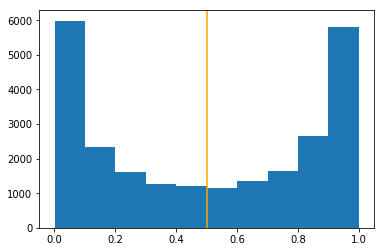

In [16]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [17]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [18]:
"{:0.2f}".format(pct_auc)

'92.30'